## 최대낙폭 (MDD)
-  Maximum Draw Down
- MDD = (1 - (종가 / 전고점)) * 100 

In [22]:
# API 사용
import FinanceDataReader as fdr
symbol_kospi = fdr.DataReader('KS11', '2000','20231231')
symbol_kospi.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,-0.0055,2,-14.28,9467808991589,2.080483e+15
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,-0.0002,2,-0.51,8848287882829,2.082856e+15
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,0.0012,1,3.08,9582765574870,2.085608e+15
2023-12-27,2599.35,2613.50,2590.08,2613.50,349733378,0.0042,1,10.91,10359763878782,2.093997e+15
2023-12-28,2616.27,2655.28,2611.72,2655.28,460086621,0.0160,1,41.78,9418929602384,2.126373e+15


In [23]:
symbol_kospi['전고점'] = symbol_kospi['Close'].cummax()
symbol_kospi

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,전고점
Date,,,,,,,,,,,
2000-01-04,1028.33,1066.18,1016.59,1059.04,195898660,0.0301,1,30.97,3771013000000,NaN,1059.04
2000-01-05,1006.87,1047.70,984.05,986.31,257696170,-0.0687,2,-72.73,4798126000000,NaN,1059.04
2000-01-06,1013.95,1014.90,953.50,960.79,203523570,-0.0259,2,-25.52,3726898000000,NaN,1059.04
2000-01-07,949.17,970.16,930.84,948.65,215664150,-0.0126,2,-12.14,3696686000000,NaN,1059.04
2000-01-10,979.67,994.94,965.02,987.24,240175480,0.0407,1,38.59,3815037000000,NaN,1059.04
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,-0.0055,2,-14.28,9467808991589,2.080483e+15,3305.21
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,-0.0002,2,-0.51,8848287882829,2.082856e+15,3305.21
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,0.0012,1,3.08,9582765574870,2.085608e+15,3305.21


In [24]:
symbol_kospi['DD'] = (1 - (symbol_kospi['Close'] / ['전고점'])) * 100 

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
symbol_kospi['DD'].max()

KeyError: 'DD'

### Chart 작성

In [13]:
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)

KeyError: 'DD'

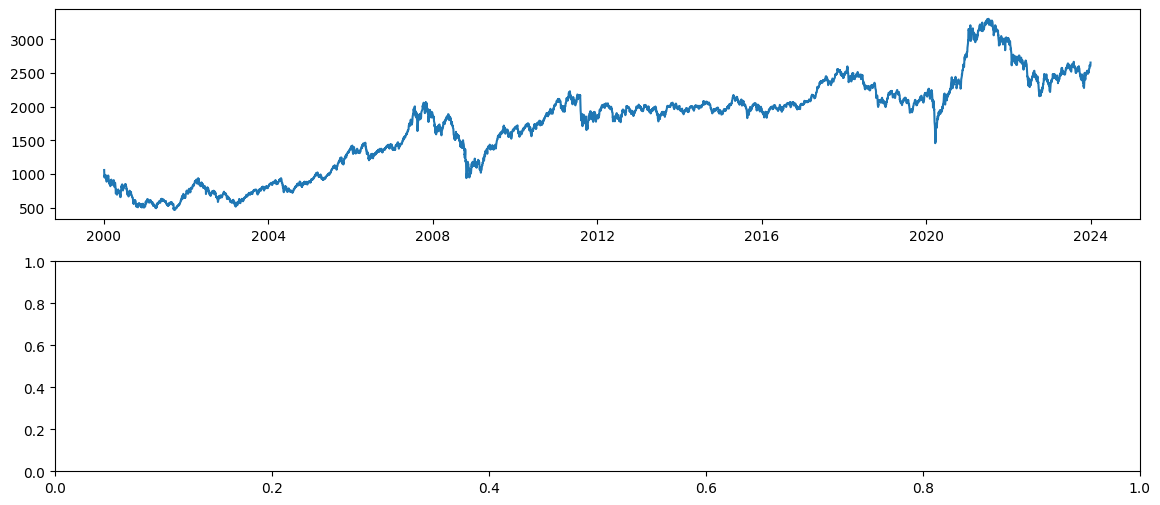

In [25]:
fig, axes = plt.subplots(2,1, figsize=(14,6))

#종가 기준 그래프
axes[0].plot(symbol_kospi.index, symbol_kospi['Close'] )

#MDD
axes[1].plot(symbol_kospi.index, symbol_kospi['DD']*-1)
axes[1].fill_between(symbol_kospi.index, symbol_kospi['DD']*-1, alpha=0.3, color='red')

plt.tighy_layout()
plt.show()